In [1]:
from elexon import ElexonRawClient
from calendar import monthrange
import datetime
import numpy as np
import pandas as pd
from tabulate import tabulate
from tqdm import tqdm
from sys import exit
from tqdm import tqdm
import os
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings("ignore")

In [79]:
Month = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',
         7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
Seasons = {1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',
         7:'Summer',8:'Summer',9:'Autumn',10:'Autumn',11:'Autumn',12:'Winter'}
DayName = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
WeekDayWeekend = {0:'Weekday',1:'Weekday',2:'Weekday',3:'Weekday',4:'Weekday',5:'WeekEnd',6:'WeekEnd'}

In [80]:
def Create_PDFs(Filename,Identifier):
    p = PdfPages(Filename)
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in tqdm(figs, desc=f'  Plotting {Identifier} ...'):
        fig.savefig(p, format='pdf')
    p.close()
#    
def GetMonth(num):
    MonthNames = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",
        8:"August",9:"September",10:"October",11:"November",12:"December"}
    return(MonthNames[num])
#
def GetCoeffVariation (listofval): # Co-efficient of variation (CV)
    MeanVal = sum(listofval)/len(listofval)
    StdDev = np.std(listofval)
    # Standard deviation divided by the mean, lower the better (more stable).
    VolRatio = abs(StdDev/MeanVal) 
    return (round(VolRatio,5))

In [4]:
# For Half Hourly
HalfHourlyDF = pd.read_csv("0.DataSource/National Demand/df_fuel_ckan_WithDemand.csv")
HalfHourlyDF['DATETIME'] = pd.to_datetime(HalfHourlyDF['DATETIME'])
HalfHourlyDF = HalfHourlyDF.loc[(HalfHourlyDF['DATETIME'].dt.year >= 2009) & (HalfHourlyDF['DATETIME'].dt.year <= 2023)]
#
HalfHourlyDF['Year'],HalfHourlyDF['Month'],HalfHourlyDF['Day'],HalfHourlyDF['WeekNumber'],HalfHourlyDF['DaysOfTheYear'],\
    HalfHourlyDF['DayOfTheWeek'],HalfHourlyDF['Hour'],HalfHourlyDF['Minute'] = HalfHourlyDF['DATETIME'].dt.year,\
    HalfHourlyDF['DATETIME'].dt.month,HalfHourlyDF['DATETIME'].dt.day,HalfHourlyDF['DATETIME'].dt.isocalendar().week,\
    HalfHourlyDF['DATETIME'].dt.dayofyear,HalfHourlyDF['DATETIME'].dt.dayofweek,HalfHourlyDF['DATETIME'].dt.hour,HalfHourlyDF['DATETIME'].dt.minute
HalfHourlyDF

,DATETIME,SETTLEMENT_DATE,SETTLEMENT_PERIOD,SBP(GBP/MWh),SSP(GBP/MWh),MID_APX_VOLUME(MWh),MID_APX_PRICE(GBP/MWh),MID_N2EX_VOLUME(MWh),MID_N2EX_PRICE(GBP/MWh),SSP_(GBP/MWh),...,ELECLINK_FLOW,VIKING_FLOW,Year,Month,Day,WeekNumber,DaysOfTheYear,DayOfTheWeek,Hour,Minute
0,2009-01-01 00:00:00+00:00,01/01/2009,1,74.74388,58.0500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2009,1,1,1,1,3,0,0
1,2009-01-01 00:30:00+00:00,01/01/2009,2,74.89376,56.3300,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2009,1,1,1,1,3,0,30
2,2009-01-01 01:00:00+00:00,01/01/2009,3,76.40902,52.9800,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2009,1,1,1,1,3,1,0
3,2009-01-01 01:30:00+00:00,01/01/2009,4,50.39000,37.7289,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2009,1,1,1,1,3,1,30
4,2009-01-01 02:00:00+00:00,01/01/2009,5,59.00000,48.7000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2009,1,1,1,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262939,2023-12-31 21:30:00+00:00,31/12/2023,44,47.94000,47.9400,1172.25,47.94,0.0,0.0,47.94,...,997.0,601.0,2023,12,31,52,365,6,21,30
262940,2023-12-31 22:00:00+00:00,31/12/2023,45,58.39000,58.3900,1155.85,58.39,0.0,0.0,58.39,...,997.0,601.0,2023,12,31,52,365,6,22,0
262941,2023-12-31 22:30:00+00:00,31/12/2023,46,8.72000,8.7200,1167.05,44.07,0.0,0.0,8.72,...,998.0,599.0,2023,12,31,52,365,6,22,30
262942,2023-12-31 23:00:00+00:00,31/12/2023,47,5.00000,5.0000,820.35,43.04,0.0,0.0,5.00,...,998.0,512.0,2023,12,31,52,365,6,23,0


In [60]:
# For Hourly
HourlyDF = pd.read_csv("0.DataSource/National Demand/df_fuel_ckan_DemandPriceTemp_Hourly.csv")
SystemInertia = pd.read_csv("0.DataSource/SystemInertia/SystemInertia.csv")
HourlyDF['DATETIME'] = pd.to_datetime(HourlyDF['DATETIME'])
SystemInertia['Settlement Date'] = pd.to_datetime(SystemInertia['Settlement Date'])
HourlyDF = HourlyDF.loc[(HourlyDF['DATETIME'].dt.year >= 2009) & (HourlyDF['DATETIME'].dt.year <= 2023)]
#
HourlyDF['Year'],HourlyDF['Month'],HourlyDF['Day'],HourlyDF['WeekNumber'],HourlyDF['DaysOfTheYear'],\
    HourlyDF['DayOfTheWeek'],HourlyDF['Hour'] = HourlyDF['DATETIME'].dt.year,\
    HourlyDF['DATETIME'].dt.month,HourlyDF['DATETIME'].dt.day,HourlyDF['DATETIME'].dt.isocalendar().week,\
    HourlyDF['DATETIME'].dt.dayofyear,HourlyDF['DATETIME'].dt.dayofweek,HourlyDF['DATETIME'].dt.hour
#
HourlyDF["Total_MWh_VolumeDelivered"] = abs(HourlyDF["MID_APX_VOLUME(MWh)"]) + abs(HourlyDF["MID_N2EX_VOLUME(MWh)"]) + abs(HourlyDF["NIV(MWh)"]) + abs(HourlyDF["NordPool_HH_Vol(MWh)"]) + abs(HourlyDF["NordPool_DA_H_Vol(MWh)"])
HourlyDF["Total_MWh_VolumeDeliveredCost"] = abs(HourlyDF["MID_APX_VOLUME(MWh)"] * HourlyDF["MID_APX_PRICE(GBP/MWh)"]) \
                                            + abs(HourlyDF["MID_N2EX_VOLUME(MWh)"] * HourlyDF["MID_N2EX_PRICE(GBP/MWh)"]) \
                                            + abs(HourlyDF["NIV(MWh)"] * HourlyDF["SSP(GBP/MWh)"]) \
                                            + abs(HourlyDF["NordPool_HH_Vol(MWh)"] * HourlyDF["NordPool_HH_Price(GBP/MWh)"]) \
                                            + abs(HourlyDF["NordPool_DA_H_Vol(MWh)"] * HourlyDF["NordPool_DA_H_Price(GBP/MWh)"])
#
HourlyDF["Total_MWh_VolumeCostPerMWh"] = HourlyDF["Total_MWh_VolumeDeliveredCost"] / HourlyDF["Total_MWh_VolumeDelivered"]

HourlyDF["ND_Total_VolumeRepresented_Perc"] = (HourlyDF["Total_MWh_VolumeDelivered"] / HourlyDF["NATIONAL DEMAND"])*100
#
HourlyDF['Seasons'] = HourlyDF['Month'].map(Seasons)
HourlyDF['WeekDay_OR_Weekend'] = HourlyDF['DayOfTheWeek'].map(WeekDayWeekend)
HourlyDF.insert(2,'Seasons',HourlyDF.pop('Seasons'))

In [61]:
SunHoursDF = pd.read_csv("0.DataSource/SheffieldDayLightHours.csv") # Monthly SunHours from Sheffield ## https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/sheffielddata.txt

In [62]:
StartingYear = 2017
EndYear = 2023

In [63]:
HourlyDF = HourlyDF.loc[(HourlyDF['DATETIME'].dt.year >= StartingYear)]
HalfHourlyDF = HalfHourlyDF.loc[(HalfHourlyDF['DATETIME'].dt.year >= StartingYear)]

In [9]:
##############################################################################################
##############################################################################################
#  Correlation Dataframe HALF-HOURLY.
Years = tqdm(range(StartingYear,EndYear+1))
#
DFCorr_HalfHourly = pd.DataFrame(columns=['Date','Year','Month','Month Name','Day','DaysOfTheYear',\
                                      'Corr_IntensitySBPPric',
                                      'CV_Demand','CV_CarbonIntensity','CV_SystemBuyPrice','CV_RenewablePercent',\
                                      'DayMeanRenewablePerc','DayMeanSBP'])
for Year in Years:
    DF_YEAR = HalfHourlyDF.loc[(HalfHourlyDF['DATETIME'].dt.year == Year)]
    Years.set_description(f'Correlation calculating: {Year} ##>>')
    YearDay = 0
    for Month in range(1,12+1):
        DF_MONTH = DF_YEAR.loc[(DF_YEAR['DATETIME'].dt.month == Month)]
        Days = monthrange(Year,Month)[1]
        MonthName = GetMonth(Month)
        MonthStr = str(Month).zfill(2)
        MonthName = f"{MonthStr}-{MonthName}"
        for Day in range(1,Days+1):
            Date = datetime.date(Year,Month,Day)
            YearDay += 1
            DataList = []
            DF_Day = DF_MONTH.loc[(DF_MONTH['DATETIME'].dt.day == Day)]
            #
            Corr_IntensitySBPPric = round(DF_Day['CARBON_INTENSITY'].corr(DF_Day['SBP(GBP/MWh)']),4)
            #
            CV_Demand = GetCoeffVariation(DF_Day['NATIONAL DEMAND'].tolist())
            CV_CarbonIntensity = GetCoeffVariation(DF_Day['CARBON_INTENSITY'].tolist())
            CV_SystemBuyPrice = GetCoeffVariation(DF_Day['SBP(GBP/MWh)'].tolist())
            CV_RenewablePercent = GetCoeffVariation(DF_Day['RENEWABLE_perc'].tolist())
            #
            DayMeanRenewablePerc = DF_Day['RENEWABLE_perc'].mean()
            DayMeanSBP = DF_Day['SBP(GBP/MWh)'].mean()
            #
            DataList.extend([Date,Year,Month,MonthName,Day,YearDay,\
                             Corr_IntensitySBPPric,\
                             CV_Demand,CV_CarbonIntensity,CV_SystemBuyPrice,CV_RenewablePercent,\
                             DayMeanRenewablePerc,DayMeanSBP])
            DFCorr_HalfHourly.loc[len(DFCorr_HalfHourly), DFCorr_HalfHourly.columns] = (DataList)
DFCorr_HalfHourly['Seasons'] = DFCorr_HalfHourly['Month'].map(Seasons)
DFCorr_HalfHourly.insert(3,'Seasons',DFCorr_HalfHourly.pop('Seasons'))
DFCorr_HalfHourly

Correlation calculating: 2023 ##>>: 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]


,Date,Year,Month,Seasons,Month Name,Day,DaysOfTheYear,Corr_IntensitySBPPric,CV_Demand,CV_CarbonIntensity,CV_SystemBuyPrice,CV_RenewablePercent,DayMeanRenewablePerc,DayMeanSBP
0,2018-01-01,2018,1,Winter,01-January,1,1,-0.1719,0.18219,0.19152,0.29675,0.21063,30.804167,51.034501
1,2018-01-02,2018,1,Winter,01-January,2,2,0.1862,0.21928,0.16054,0.40501,0.18631,24.283333,47.860342
2,2018-01-03,2018,1,Winter,01-January,3,3,0.0693,0.20343,0.16498,0.40334,0.1493,30.116667,49.904413
3,2018-01-04,2018,1,Winter,01-January,4,4,0.2863,0.17923,0.12793,0.41949,0.21444,18.645833,44.453171
4,2018-01-05,2018,1,Winter,01-January,5,5,0.3611,0.17724,0.14591,0.61689,0.17988,11.5875,61.211245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,2023-12-27,2023,12,Winter,12-December,27,361,-0.3775,0.2063,0.2531,1.1505,0.11831,58.822917,41.076675
2187,2023-12-28,2023,12,Winter,12-December,28,362,-0.1693,0.19831,0.1905,2.51461,0.06143,63.264583,17.693323
2188,2023-12-29,2023,12,Winter,12-December,29,363,0.4702,0.21521,0.18497,0.78642,0.13149,55.279167,65.966734
2189,2023-12-30,2023,12,Winter,12-December,30,364,-0.5784,0.14818,0.22851,0.80649,0.11565,52.714583,53.667085


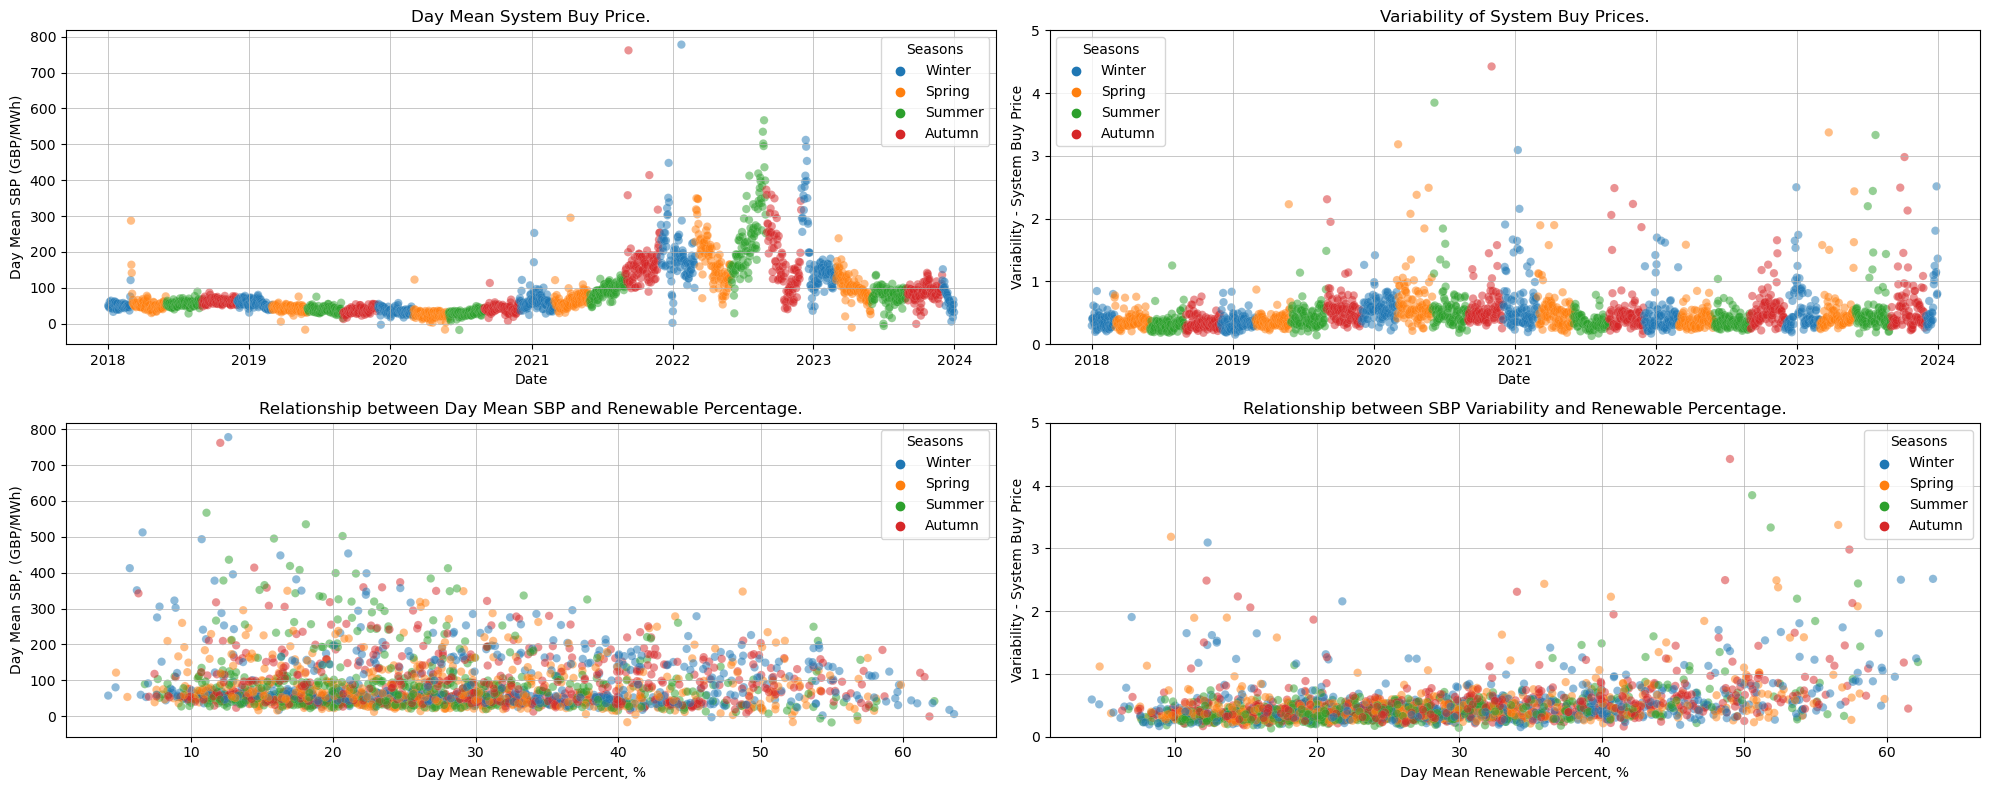

In [10]:
plt.figure(figsize=(20,8))
#
plt.subplot(2,2,1)
sns.scatterplot(data=DFCorr_HalfHourly, x='Date', y='DayMeanSBP',linewidth=0.1,alpha=0.5,hue="Seasons")
plt.title("Day Mean System Buy Price.")
plt.ylabel("Day Mean SBP (GBP/MWh)")
plt.xlabel("Date")
plt.grid(which='both',linewidth = 0.5)
#
plt.subplot(2,2,2)
sns.scatterplot(data=DFCorr_HalfHourly, x='Date', y='CV_SystemBuyPrice',linewidth=0.1,alpha=0.5,hue="Seasons")
plt.title("Variability of System Buy Prices.")
plt.ylabel("Variability - System Buy Price")
plt.xlabel("Date")
plt.ylim(0,5)
plt.grid(which='both',linewidth = 0.5)
#
plt.subplot(2,2,3)
sns.scatterplot(data=DFCorr_HalfHourly, x='DayMeanRenewablePerc', y='DayMeanSBP',linewidth=0.1,alpha=0.5,hue="Seasons")
plt.title("Relationship between Day Mean SBP and Renewable Percentage.")
plt.ylabel("Day Mean SBP, (GBP/MWh)")
plt.xlabel("Day Mean Renewable Percent, %")
plt.grid(which='both',linewidth = 0.5)
#
plt.subplot(2,2,4)
sns.scatterplot(data=DFCorr_HalfHourly, x='DayMeanRenewablePerc', y='CV_SystemBuyPrice',linewidth=0.1,alpha=0.5,hue="Seasons")
plt.title("Relationship between SBP Variability and Renewable Percentage.")
plt.ylabel("Variability - System Buy Price")
plt.xlabel("Day Mean Renewable Percent, %")
plt.grid(which='both',linewidth = 0.5)
plt.ylim(0,5)
plt.tight_layout()

In [11]:
TopXX = 20

In [12]:
# Half-Hourly ranking based on CV_SystemBuyPrice
#
DFCorr_HalfHourly['CV_SystemBuyPrice'] = pd.to_numeric(DFCorr_HalfHourly['CV_SystemBuyPrice'])
TopCoeffs = tqdm(range(TopXX))
for I in TopCoeffs:
    Top = 1+I
    HighestIndex = DFCorr_HalfHourly.nlargest(Top,'CV_SystemBuyPrice').index.values[I]
    HighestValue = DFCorr_HalfHourly.nlargest(Top,'CV_SystemBuyPrice').values[I][10]
    LowestIndex = DFCorr_HalfHourly.nsmallest(Top,'CV_SystemBuyPrice').index.values[I]
    LowestValue = DFCorr_HalfHourly.nsmallest(Top,'CV_SystemBuyPrice').values[I][10]
    CorrYearHighest,CorrMonthHighest,CorrDayHighest = DFCorr_HalfHourly['Year'][HighestIndex],DFCorr_HalfHourly['Month'][HighestIndex],DFCorr_HalfHourly['Day'][HighestIndex]
    CorrYearLowest,CorrMonthLowest,CorrDayLowest = DFCorr_HalfHourly['Year'][LowestIndex],DFCorr_HalfHourly['Month'][LowestIndex],DFCorr_HalfHourly['Day'][LowestIndex]
    #
    HighestCorrDF = HalfHourlyDF.loc[(HalfHourlyDF['DATETIME'].dt.year == CorrYearHighest) & (HalfHourlyDF['DATETIME'].dt.month == CorrMonthHighest) & (HalfHourlyDF['DATETIME'].dt.day == CorrDayHighest)]
    LowestCorrDF = HalfHourlyDF.loc[(HalfHourlyDF['DATETIME'].dt.year == CorrYearLowest) & (HalfHourlyDF['DATETIME'].dt.month == CorrMonthLowest) & (HalfHourlyDF['DATETIME'].dt.day == CorrDayLowest)]
    HighDateVals = f"{CorrYearHighest}-{CorrMonthHighest}-{CorrDayHighest}"
    LowDateVals = f"{CorrYearLowest}-{CorrMonthLowest}-{CorrDayLowest}"
    #print("Highest: ",Top,CorrYearHighest,CorrMonthHighest,CorrDayHighest," ## ",HighestValue,"<<<<#####>>>>","Lowest: ",Top,CorrYearLowest,CorrMonthLowest,CorrDayLowest," ## ",LowestValue, " Started.")
    if (CorrYearHighest < 2015) or (CorrYearLowest < 2015):
        print(f"Skipping Top {Top} CV_SystemBuyPrice, since the year is less than 2015 (actual high {HighDateVals} ({HighestValue}), low {LowDateVals} ({LowestValue})) before the NIV(MWh) volume data is availiable.")
        continue
    # The Coefficent of Varience is -ve to prevent situation where a very small -ve/+ve mean could swing the results is all sorts of direction. 
    plt.figure(figsize=(25,14))
    plt.suptitle(f"TITLE: Highest (Red) and Lowest (Green) variability days, in (System Buy Prices).\n\
                            Highest 'CV_SystemBuyPrice' Day {HighDateVals} # {HighestValue} ### Lowest 'CV_SystemBuyPrice' Day {LowDateVals} # {LowestValue}\n#####################################\n")
    plt.subplot(3,3,1)
    sns.lineplot(data=HighestCorrDF, x="SETTLEMENT_PERIOD", y="SBP(GBP/MWh)",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="SETTLEMENT_PERIOD", y="SBP(GBP/MWh)",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, System Buy/Sell Price (GBP).")
    plt.xlabel("Settlement Period (1-48)")
    plt.ylabel("SBP(GBP/MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,2)
    sns.lineplot(data=HighestCorrDF, x="SETTLEMENT_PERIOD", y="NIV(MWh)",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="SETTLEMENT_PERIOD", y="NIV(MWh)",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, Net Imbalance Volume (MWh).")
    plt.xlabel("Settlement Period (1-48)")
    plt.ylabel("Net Imbalance Volume, (MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,3)
    sns.lineplot(data=HighestCorrDF, x="SETTLEMENT_PERIOD", y="MID_APX_PRICE(GBP/MWh)",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="SETTLEMENT_PERIOD", y="MID_APX_PRICE(GBP/MWh)",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, Market Index (APX) Price (GBP/MWh).")
    plt.xlabel("Settlement Period (1-48)")
    plt.ylabel("Market Index Price, (GBP/MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,4)
    sns.lineplot(data=HighestCorrDF, x="SETTLEMENT_PERIOD", y="MID_APX_VOLUME(MWh)",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="SETTLEMENT_PERIOD", y="MID_APX_VOLUME(MWh)",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, Market Index (APX) Volume (MWh).")
    plt.xlabel("Settlement Period (1-48)")
    plt.ylabel("Market Index Volume, (MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,5)
    sns.lineplot(data=HighestCorrDF, x="SETTLEMENT_PERIOD", y="NET_INTCONNECTOR_FLOW",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="SETTLEMENT_PERIOD", y="NET_INTCONNECTOR_FLOW",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest Net Interconnector Flows (MW).")
    plt.xlabel("Settlement Period (1-48)")
    plt.ylabel("Net Interconnector Flow, (MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,6)
    sns.lineplot(data=HighestCorrDF, x="SETTLEMENT_PERIOD", y="CARBON_INTENSITY",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="SETTLEMENT_PERIOD", y="CARBON_INTENSITY",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, Grid Carbon Intensity (gCO2/kWh).")
    plt.xlabel("Settlement Period (1-48)")
    plt.ylabel("Grid Carbon Intensity (gCO2/kWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,7)
    Items = ['GAS_perc','COAL_perc','NUCLEAR_perc','WIND_perc','HYDRO_perc','IMPORTS_perc','BIOMASS_perc','OTHER_perc','SOLAR_perc','STORAGE_perc']
    for gens in Items:
        plt.scatter(HighestCorrDF['SETTLEMENT_PERIOD'],HighestCorrDF[gens])
    plt.title(f"Rank {Top} Highest # GB-Electricity Demand, %.\n###High {HighDateVals} # {HighestValue}###.",color='r')
    plt.xlabel("Settlement Period (1-48)")
    plt.ylabel("Demand Contributions (%)")
    plt.grid(which='both',linewidth = 0.5)
    plt.legend(labels=['Gas','Coal','Nuclear','Wind','Hydro','Imports','Biomass','Other','Solar','Storage'])
    #
    plt.subplot(3,3,8)
    for gens in Items:
        plt.scatter(LowestCorrDF['SETTLEMENT_PERIOD'],LowestCorrDF[gens])
    plt.title(f"Rank {Top} Lowest # GB-Electricity Demand, %.\n###Low {LowDateVals} # {LowestValue}###.",color='g')
    plt.xlabel("Settlement Period (1-48)")
    plt.ylabel("Demand Contributions (%)")
    plt.grid(which='both',linewidth = 0.5)
    plt.legend(labels=['Gas','Coal','Nuclear','Wind','Hydro','Imports','Biomass','Other','Solar','Storage'])
    #
    plt.subplot(3,3,9)
    sns.lineplot(data=HighestCorrDF, x="SETTLEMENT_PERIOD", y="NATIONAL DEMAND",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="SETTLEMENT_PERIOD", y="NATIONAL DEMAND",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, National Demand (MW).\nHigh {HighDateVals} # {HighestValue} ### Low {LowDateVals} # {LowestValue}.")
    plt.xlabel("Settlement Period (1-48)")
    plt.ylabel("National Demand, MW")
    plt.grid(which='both',linewidth = 0.5)
    plt.tight_layout()
pdf_Filename = "3.Methodology/HalfHourly_CV_SystemBuyPrice48.pdf"
Create_PDFs(pdf_Filename,'Correlation')
plt.close('all')

  Plotting Correlation ...: 100%|██████████| 20/20 [00:11<00:00,  1.67it/s]


In [13]:
# Half-Hourly ranking based on Corr_IntensitySBPPric
# Corr_IntensitySBPPric = round(DF_Day['CARBON_INTENSITY'].corr(DF_Day['SBP(GBP/MWh)']),4)
DFCorr_HalfHourly['Corr_IntensitySBPPric'] = pd.to_numeric(DFCorr_HalfHourly['Corr_IntensitySBPPric'])
TopCoeffs = tqdm(range(TopXX))
for I in TopCoeffs:
    Top = 1+I
    HighestIndex = DFCorr_HalfHourly.nlargest(Top,'Corr_IntensitySBPPric').index.values[I]
    HighestValue = DFCorr_HalfHourly.nlargest(Top,'Corr_IntensitySBPPric').values[I][7]
    LowestIndex = DFCorr_HalfHourly.nsmallest(Top,'Corr_IntensitySBPPric').index.values[I]
    LowestValue = DFCorr_HalfHourly.nsmallest(Top,'Corr_IntensitySBPPric').values[I][7]
    CorrYearHighest,CorrMonthHighest,CorrDayHighest = DFCorr_HalfHourly['Year'][HighestIndex],DFCorr_HalfHourly['Month'][HighestIndex],DFCorr_HalfHourly['Day'][HighestIndex]
    CorrYearLowest,CorrMonthLowest,CorrDayLowest = DFCorr_HalfHourly['Year'][LowestIndex],DFCorr_HalfHourly['Month'][LowestIndex],DFCorr_HalfHourly['Day'][LowestIndex]
    #
    HighestCorrDF = HalfHourlyDF.loc[(HalfHourlyDF['DATETIME'].dt.year == CorrYearHighest) & (HalfHourlyDF['DATETIME'].dt.month == CorrMonthHighest) & (HalfHourlyDF['DATETIME'].dt.day == CorrDayHighest)]
    LowestCorrDF = HalfHourlyDF.loc[(HalfHourlyDF['DATETIME'].dt.year == CorrYearLowest) & (HalfHourlyDF['DATETIME'].dt.month == CorrMonthLowest) & (HalfHourlyDF['DATETIME'].dt.day == CorrDayLowest)]
    HighDateVals = f"{CorrYearHighest}-{CorrMonthHighest}-{CorrDayHighest}"
    LowDateVals = f"{CorrYearLowest}-{CorrMonthLowest}-{CorrDayLowest}"
    #print("Highest: ",Top,CorrYearHighest,CorrMonthHighest,CorrDayHighest," ## ",HighestValue,"<<<<#####>>>>","Lowest: ",Top,CorrYearLowest,CorrMonthLowest,CorrDayLowest," ## ",LowestValue, " Started.")
    if (CorrYearHighest < 2015) or (CorrYearLowest < 2015):
        print(f"Skipping Top {Top} CV_SystemBuyPrice, since the year is less than 2015 (actual high {HighDateVals} ({HighestValue}), low {LowDateVals} ({LowestValue})) before the NIV(MWh) volume data is availiable.")
        continue
    # The Coefficent of Varience is -ve to prevent situation where a very small -ve/+ve mean could swing the results is all sorts of direction. 
    plt.figure(figsize=(25,14))
    plt.suptitle(f"TITLE: Highest (Red) and Lowest (Green) correlated days between (Grid Carbon Intenstiy and System Buy Price).\n\
                        Highest 'Corr_IntensitySBPPric' Day {HighDateVals} # {HighestValue} ### Lowest 'Corr_IntensitySBPPric' Day {LowDateVals} # {LowestValue}\n#####################################\n")
    plt.subplot(3,3,1)
    sns.lineplot(data=HighestCorrDF, x="SETTLEMENT_PERIOD", y="SBP(GBP/MWh)",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="SETTLEMENT_PERIOD", y="SBP(GBP/MWh)",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, System Buy/Sell Price (GBP).")
    plt.xlabel("Settlement Period (1-48)")
    plt.ylabel("SBP(GBP/MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,2)
    sns.lineplot(data=HighestCorrDF, x="SETTLEMENT_PERIOD", y="NIV(MWh)",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="SETTLEMENT_PERIOD", y="NIV(MWh)",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, Net Imbalance Volume (MWh).")
    plt.xlabel("Settlement Period (1-48)")
    plt.ylabel("Net Imbalance Volume, (MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,3)
    sns.regplot(data=HighestCorrDF, x="CARBON_INTENSITY", y="SBP(GBP/MWh)",order=2, line_kws=dict(color="r"),color='r')
    plt.title(f"Rank {Top} Highest correlated # Carbon Intensity and SBP.\n###High {HighDateVals} # {HighestValue}###.",color='r')
    plt.xlabel("Carbon Intensity (gCO2/kWh)")
    plt.ylabel("SBP(GBP/MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,4)
    sns.regplot(data=LowestCorrDF, x="CARBON_INTENSITY", y="SBP(GBP/MWh)",order=2, line_kws=dict(color="g"),color='g')
    plt.title(f"Rank {Top} Lowest correlated # Carbon Intensity and SBP.\n###Low {LowDateVals} # {LowestValue}###.",color='g')
    plt.xlabel("Carbon Intensity (gCO2/kWh)")
    plt.ylabel("SBP(GBP/MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,5)
    sns.lineplot(data=HighestCorrDF, x="SETTLEMENT_PERIOD", y="NET_INTCONNECTOR_FLOW",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="SETTLEMENT_PERIOD", y="NET_INTCONNECTOR_FLOW",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest Net Interconnector Flows (MW).")
    plt.xlabel("Settlement Period (1-48)")
    plt.ylabel("Net Interconnector Flow, (MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,6)
    sns.lineplot(data=HighestCorrDF, x="SETTLEMENT_PERIOD", y="CARBON_INTENSITY",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="SETTLEMENT_PERIOD", y="CARBON_INTENSITY",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, Grid Carbon Intensity (gCO2/kWh).")
    plt.xlabel("Settlement Period (1-48)")
    plt.ylabel("Grid Carbon Intensity (gCO2/kWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,7)
    Items = ['GAS_perc','COAL_perc','NUCLEAR_perc','WIND_perc','HYDRO_perc','IMPORTS_perc','BIOMASS_perc','OTHER_perc','SOLAR_perc','STORAGE_perc']
    for gens in Items:
        plt.scatter(HighestCorrDF['SETTLEMENT_PERIOD'],HighestCorrDF[gens])
    plt.title(f"Rank {Top} Highest # GB-Electricity Demand, %.\n###High {HighDateVals} # {HighestValue}###.",color='r')
    plt.xlabel("Settlement Period (1-48)")
    plt.ylabel("Demand Contributions (%)")
    plt.grid(which='both',linewidth = 0.5)
    plt.legend(labels=['Gas','Coal','Nuclear','Wind','Hydro','Imports','Biomass','Other','Solar','Storage'])
    #
    plt.subplot(3,3,8)
    for gens in Items:
        plt.scatter(LowestCorrDF['SETTLEMENT_PERIOD'],LowestCorrDF[gens])
    plt.title(f"Rank {Top} Lowest # GB-Electricity Demand, %.\n###Low {LowDateVals} # {LowestValue}###.",color='g')
    plt.xlabel("Settlement Period (1-48)")
    plt.ylabel("Demand Contributions (%)")
    plt.grid(which='both',linewidth = 0.5)
    plt.legend(labels=['Gas','Coal','Nuclear','Wind','Hydro','Imports','Biomass','Other','Solar','Storage'])
    #
    plt.subplot(3,3,9)
    sns.lineplot(data=HighestCorrDF, x="SETTLEMENT_PERIOD", y="NATIONAL DEMAND",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="SETTLEMENT_PERIOD", y="NATIONAL DEMAND",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, National Demand (MW).\nHigh {HighDateVals} # {HighestValue} ### Low {LowDateVals} # {LowestValue}.")
    plt.xlabel("Settlement Period (1-48)")
    plt.ylabel("National Demand, MW")
    plt.grid(which='both',linewidth = 0.5)
    plt.tight_layout()
pdf_Filename = "3.Methodology/HalfHourly_Corr_IntensitySBPPric48.pdf"
Create_PDFs(pdf_Filename,'Correlation')
plt.close('all')

  Plotting Correlation ...: 100%|██████████| 20/20 [00:12<00:00,  1.59it/s]


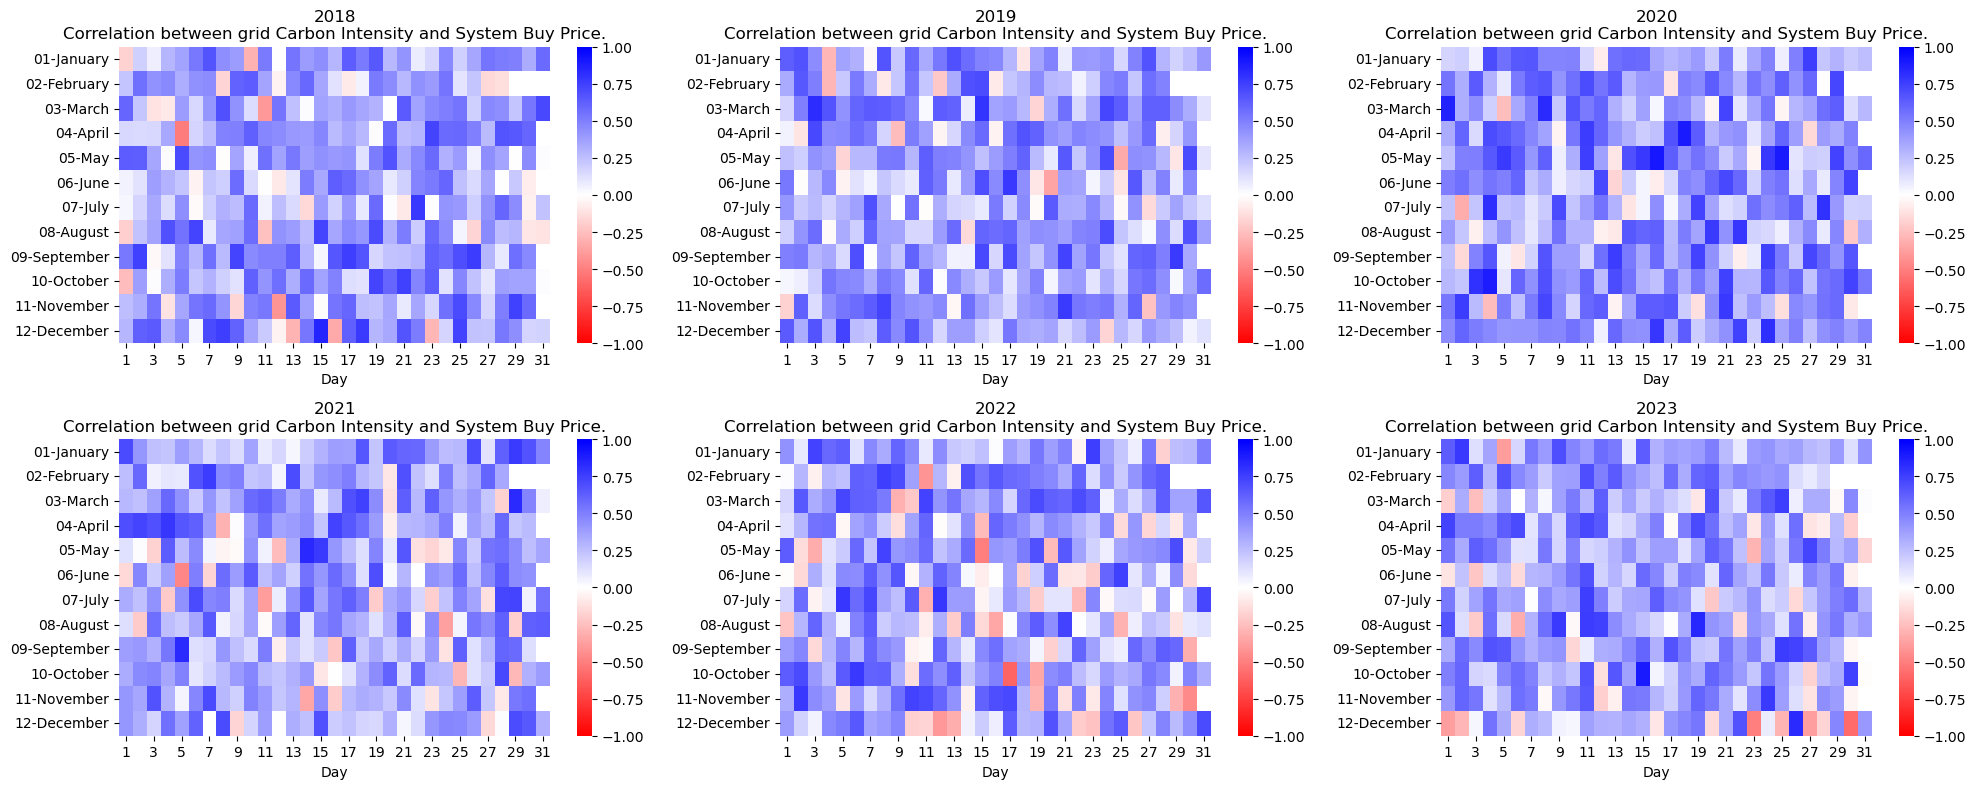

In [14]:
ColourMap = LinearSegmentedColormap.from_list('',['red','white','blue'])
plt.figure(figsize=(20,8))
fignums_1 = 0
for Year in Years:
    fignums_1 += 1
    YearlyTable = DFCorr_HalfHourly.loc[(DFCorr_HalfHourly['Year'] == Year)]
    PivotTbl = pd.pivot_table(YearlyTable, values='Corr_IntensitySBPPric', index=['Month Name'],columns=['Day'])
    plt.subplot(2,3,fignums_1)
    sns.heatmap(PivotTbl,vmin=-1,vmax=1,center=0,cmap=ColourMap)
    plt.title(f'{Year}\nCorrelation between grid Carbon Intensity and System Buy Price.')
    plt.xlabel('Day')
    plt.ylabel('')
plt.tight_layout()

In [15]:
##############################################################################################
##############################################################################################
#  Correlation Dataframe HOURLY.
Years = tqdm(range(StartingYear,EndYear+1))
#
DFCorr_Hourly = pd.DataFrame(columns=['Date','Year','Month','Month Name','Day','DaysOfTheYear',\
                                      'Corr_Intensity_NordDA','Corr_SBP_NordDA',\
                                      'CV_NordPool_DA',\
                                      'DayMeanRenewablePerc','DayMeanNordPool_DA',\
                                      'DayInterconnectorSwing'])
for Year in Years:
    DF_YEAR = HourlyDF.loc[(HourlyDF['DATETIME'].dt.year == Year)]
    Years.set_description(f'Correlation calculating: {Year} ##>>')
    YearDay = 0
    for Month in range(1,12+1):
        DF_MONTH = DF_YEAR.loc[(DF_YEAR['DATETIME'].dt.month == Month)]
        Days = monthrange(Year,Month)[1]
        MonthName = GetMonth(Month)
        MonthStr = str(Month).zfill(2)
        MonthName = f"{MonthStr}-{MonthName}"
        for Day in range(1,Days+1):
            Date = datetime.date(Year,Month,Day)
            YearDay += 1
            DataList = []
            DF_Day = DF_MONTH.loc[(DF_MONTH['DATETIME'].dt.day == Day)]
            #
            Corr_Intensity_NordDA = round(DF_Day['CARBON_INTENSITY'].corr(DF_Day['NordPool_DA_H_Price(GBP/MWh)']),4)
            Corr_SBP_NordDA = round(DF_Day['SBP(GBP/MWh)'].corr(DF_Day['NordPool_DA_H_Price(GBP/MWh)']),4)
            #
            CV_NordPool_DA = GetCoeffVariation(DF_Day['NordPool_DA_H_Price(GBP/MWh)'].tolist())
            #
            DayMeanRenewablePerc = DF_Day['RENEWABLE_perc'].mean()
            DayMeanNordPool_DA = DF_Day['NordPool_DA_H_Price(GBP/MWh)'].mean()
            #
            DayInterconnectorSwing = int(DF_Day['NET_INTCONNECTOR_FLOW'].max() - DF_Day['NET_INTCONNECTOR_FLOW'].min())
            #
            DataList.extend([Date,Year,Month,MonthName,Day,YearDay,\
                             Corr_Intensity_NordDA,Corr_SBP_NordDA,\
                             CV_NordPool_DA,\
                             DayMeanRenewablePerc,DayMeanNordPool_DA,\
                             DayInterconnectorSwing])
            DFCorr_Hourly.loc[len(DFCorr_Hourly), DFCorr_Hourly.columns] = (DataList)
DFCorr_Hourly['Seasons'] = DFCorr_Hourly['Month'].map(Seasons)
DFCorr_Hourly.insert(3,'Seasons',DFCorr_Hourly.pop('Seasons'))
DFCorr_Hourly

Correlation calculating: 2023 ##>>: 100%|██████████| 6/6 [00:05<00:00,  1.13it/s]


,Date,Year,Month,Seasons,Month Name,Day,DaysOfTheYear,Corr_Intensity_NordDA,Corr_SBP_NordDA,CV_NordPool_DA,DayMeanRenewablePerc,DayMeanNordPool_DA,DayInterconnectorSwing
0,2018-01-01,2018,1,Winter,01-January,1,1,0.593,-0.2059,0.28582,30.804167,46.06375,2013
1,2018-01-02,2018,1,Winter,01-January,2,2,0.5753,0.3668,0.17609,24.283333,51.665,1185
2,2018-01-03,2018,1,Winter,01-January,3,3,0.6053,0.1774,0.17092,30.116667,49.8525,1371
3,2018-01-04,2018,1,Winter,01-January,4,4,0.7457,0.5867,0.20094,18.645833,53.080417,1561
4,2018-01-05,2018,1,Winter,01-January,5,5,0.7179,0.2999,0.23494,11.5875,56.81,1666
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,2023-12-27,2023,12,Winter,12-December,27,361,-0.2645,0.1973,0.27966,58.822917,58.39,10725
2187,2023-12-28,2023,12,Winter,12-December,28,362,-0.6251,0.5853,0.75759,63.264583,33.534167,11558
2188,2023-12-29,2023,12,Winter,12-December,29,363,0.507,0.68,0.88221,55.279167,39.73875,10291
2189,2023-12-30,2023,12,Winter,12-December,30,364,-0.548,0.6619,0.31332,52.714583,64.9875,4925


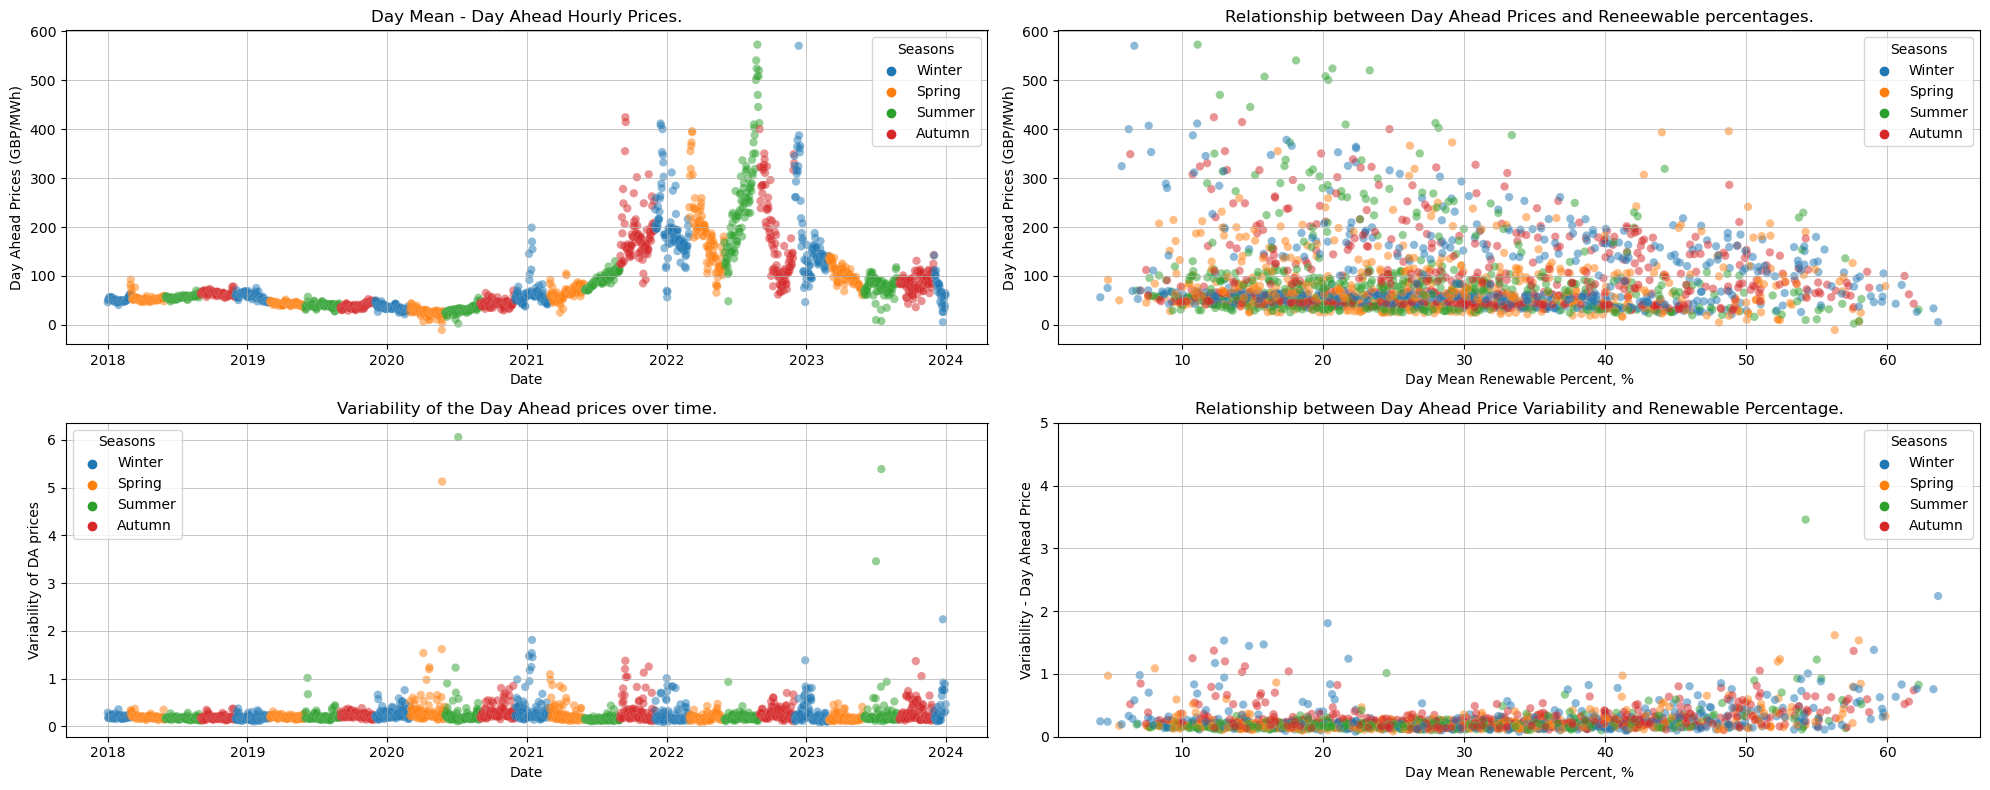

In [16]:
plt.figure(figsize=(20,8))
#
plt.subplot(2,2,1)
sns.scatterplot(data=DFCorr_Hourly, x='Date', y='DayMeanNordPool_DA',linewidth=0.1,alpha=0.5,hue="Seasons")
plt.title("Day Mean - Day Ahead Hourly Prices.")
plt.ylabel("Day Ahead Prices (GBP/MWh)")
plt.xlabel("Date")
plt.grid(which='both',linewidth = 0.5)
#
plt.subplot(2,2,2)
sns.scatterplot(data=DFCorr_Hourly, x='DayMeanRenewablePerc', y='DayMeanNordPool_DA',linewidth=0.1,alpha=0.5,hue="Seasons")
plt.title("Relationship between Day Ahead Prices and Reneewable percentages.")
plt.ylabel("Day Ahead Prices (GBP/MWh)")
plt.xlabel("Day Mean Renewable Percent, %")
#plt.ylim(0,5)
plt.grid(which='both',linewidth = 0.5)
#
plt.subplot(2,2,3)
sns.scatterplot(data=DFCorr_Hourly, x='Date', y='CV_NordPool_DA',linewidth=0.1,alpha=0.5,hue="Seasons")
plt.title("Variability of the Day Ahead prices over time.")
plt.ylabel("Variability of DA prices")
plt.xlabel("Date")
plt.grid(which='both',linewidth = 0.5)
#
plt.subplot(2,2,4)
sns.scatterplot(data=DFCorr_Hourly, x='DayMeanRenewablePerc', y='CV_NordPool_DA',linewidth=0.1,alpha=0.5,hue="Seasons")
plt.title("Relationship between Day Ahead Price Variability and Renewable Percentage.")
plt.ylabel("Variability - Day Ahead Price")
plt.xlabel("Day Mean Renewable Percent, %")
plt.grid(which='both',linewidth = 0.5)
plt.ylim(0,5)
plt.tight_layout()

In [17]:
# Hourly ranking based on CV_NordPool_DA
#
DFCorr_Hourly['CV_NordPool_DA'] = pd.to_numeric(DFCorr_Hourly['CV_NordPool_DA'])
TopCoeffs = tqdm(range(TopXX))
for I in TopCoeffs:
    Top = 1+I
    HighestIndex = DFCorr_Hourly.nlargest(Top,'CV_NordPool_DA').index.values[I]
    HighestValue = DFCorr_Hourly.nlargest(Top,'CV_NordPool_DA').values[I][9]
    LowestIndex = DFCorr_Hourly.nsmallest(Top,'CV_NordPool_DA').index.values[I]
    LowestValue = DFCorr_Hourly.nsmallest(Top,'CV_NordPool_DA').values[I][9]
    CorrYearHighest,CorrMonthHighest,CorrDayHighest = DFCorr_Hourly['Year'][HighestIndex],DFCorr_Hourly['Month'][HighestIndex],DFCorr_Hourly['Day'][HighestIndex]
    CorrYearLowest,CorrMonthLowest,CorrDayLowest = DFCorr_Hourly['Year'][LowestIndex],DFCorr_Hourly['Month'][LowestIndex],DFCorr_Hourly['Day'][LowestIndex]
    #
    HighestCorrDF = HourlyDF.loc[(HourlyDF['DATETIME'].dt.year == CorrYearHighest) & (HourlyDF['DATETIME'].dt.month == CorrMonthHighest) & (HourlyDF['DATETIME'].dt.day == CorrDayHighest)]
    LowestCorrDF = HourlyDF.loc[(HourlyDF['DATETIME'].dt.year == CorrYearLowest) & (HourlyDF['DATETIME'].dt.month == CorrMonthLowest) & (HourlyDF['DATETIME'].dt.day == CorrDayLowest)]
    HighDateVals = f"{CorrYearHighest}-{CorrMonthHighest}-{CorrDayHighest}"
    LowDateVals = f"{CorrYearLowest}-{CorrMonthLowest}-{CorrDayLowest}"
    #print("Highest: ",Top,CorrYearHighest,CorrMonthHighest,CorrDayHighest," ## ",HighestValue,"<<<<#####>>>>","Lowest: ",Top,CorrYearLowest,CorrMonthLowest,CorrDayLowest," ## ",LowestValue, " Started.")
    if (CorrYearHighest < 2015) or (CorrYearLowest < 2015):
        print(f"Skipping Top {Top} CV_SystemBuyPrice, since the year is less than 2015 (actual high {HighDateVals} ({HighestValue}), low {LowDateVals} ({LowestValue})) before the NIV(MWh) volume data is availiable.")
        continue
    # The Coefficent of Varience is -ve to prevent situation where a very small -ve/+ve mean could swing the results is all sorts of direction. 
    plt.figure(figsize=(25,14))
    plt.suptitle(f"TITLE: Highest (Red) and Lowest (Green) variability days, in (NordPool Day Ahead Hourly prices).\n\
                            Highest 'CV_NordPool_DA' Day {HighDateVals} # {HighestValue} ### Lowest 'CV_NordPool_DA' Day {LowDateVals} # {LowestValue}\n#####################################\n")
    plt.subplot(3,3,1)
    sns.lineplot(data=HighestCorrDF, x="Hour", y="SBP(GBP/MWh)",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="Hour", y="SBP(GBP/MWh)",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, System Buy/Sell Price (GBP).")
    plt.xlabel("Hour")
    plt.ylabel("SBP(GBP/MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,2)
    sns.lineplot(data=HighestCorrDF, x="Hour", y="NIV(MWh)",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="Hour", y="NIV(MWh)",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, Net Imbalance Volume (MWh).")
    plt.xlabel("Hour")
    plt.ylabel("Net Imbalance Volume, (MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,3)
    sns.lineplot(data=HighestCorrDF, x="Hour", y="NordPool_DA_H_Price(GBP/MWh)",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="Hour", y="NordPool_DA_H_Price(GBP/MWh)",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, Day Ahead Price (GBP/MWh).")
    plt.xlabel("Hour")
    plt.ylabel("Day Ahead Price, (GBP/MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,4)
    sns.lineplot(data=HighestCorrDF, x="Hour", y="NordPool_DA_H_Vol(MWh)",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="Hour", y="NordPool_DA_H_Vol(MWh)",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, DAy Ahead Volume (MWh).")
    plt.xlabel("Hour")
    plt.ylabel("Day Ahead Volume, (MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,5)
    sns.lineplot(data=HighestCorrDF, x="Hour", y="NET_INTCONNECTOR_FLOW",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="Hour", y="NET_INTCONNECTOR_FLOW",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest Net Interconnector Flows (MW).")
    plt.xlabel("Hour")
    plt.ylabel("Net Interconnector Flow, (MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,6)
    sns.lineplot(data=HighestCorrDF, x="Hour", y="CARBON_INTENSITY",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="Hour", y="CARBON_INTENSITY",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, Grid Carbon Intensity (gCO2/kWh).")
    plt.xlabel("Hour")
    plt.ylabel("Grid Carbon Intensity (gCO2/kWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,7)
    Items = ['GAS_perc','COAL_perc','NUCLEAR_perc','WIND_perc','HYDRO_perc','IMPORTS_perc','BIOMASS_perc','OTHER_perc','SOLAR_perc','STORAGE_perc']
    for gens in Items:
        plt.scatter(HighestCorrDF['Hour'],HighestCorrDF[gens])
    plt.title(f"Rank {Top} Highest # GB-Electricity Demand, %.\n###High {HighDateVals} # {HighestValue}###.",color='r')
    plt.xlabel("Hour")
    plt.ylabel("Demand Contributions (%)")
    plt.grid(which='both',linewidth = 0.5)
    plt.legend(labels=['Gas','Coal','Nuclear','Wind','Hydro','Imports','Biomass','Other','Solar','Storage'])
    #
    plt.subplot(3,3,8)
    for gens in Items:
        plt.scatter(LowestCorrDF['Hour'],LowestCorrDF[gens])
    plt.title(f"Rank {Top} Lowest # GB-Electricity Demand, %.\n###Low {LowDateVals} # {LowestValue}###.",color='g')
    plt.xlabel("Hour")
    plt.ylabel("Demand Contributions (%)")
    plt.grid(which='both',linewidth = 0.5)
    plt.legend(labels=['Gas','Coal','Nuclear','Wind','Hydro','Imports','Biomass','Other','Solar','Storage'])
    #
    plt.subplot(3,3,9)
    sns.lineplot(data=HighestCorrDF, x="Hour", y="NATIONAL DEMAND",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="Hour", y="NATIONAL DEMAND",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, National Demand (MW).\nHigh {HighDateVals} # {HighestValue} ### Low {LowDateVals} # {LowestValue}.")
    plt.xlabel("Hour")
    plt.ylabel("National Demand, MW")
    plt.grid(which='both',linewidth = 0.5)
    plt.tight_layout()
pdf_Filename = "3.Methodology/Hourly_CV_NordPool_DA_24.pdf"
Create_PDFs(pdf_Filename,'Correlation')
plt.close('all')

  Plotting Correlation ...: 100%|██████████| 20/20 [00:11<00:00,  1.69it/s]


In [18]:
# Hourly ranking based on CV_NordPool_DA
#
DFCorr_Hourly['DayInterconnectorSwing'] = pd.to_numeric(DFCorr_Hourly['DayInterconnectorSwing'])
TopCoeffs = tqdm(range(TopXX))
for I in TopCoeffs:
    Top = 1+I
    HighestIndex = DFCorr_Hourly.nlargest(Top,'DayInterconnectorSwing').index.values[I]
    HighestValue = DFCorr_Hourly.nlargest(Top,'DayInterconnectorSwing').values[I][12]
    LowestIndex = DFCorr_Hourly.nsmallest(Top,'DayInterconnectorSwing').index.values[I]
    LowestValue = DFCorr_Hourly.nsmallest(Top,'DayInterconnectorSwing').values[I][12]
    CorrYearHighest,CorrMonthHighest,CorrDayHighest = DFCorr_Hourly['Year'][HighestIndex],DFCorr_Hourly['Month'][HighestIndex],DFCorr_Hourly['Day'][HighestIndex]
    CorrYearLowest,CorrMonthLowest,CorrDayLowest = DFCorr_Hourly['Year'][LowestIndex],DFCorr_Hourly['Month'][LowestIndex],DFCorr_Hourly['Day'][LowestIndex]
    #
    HighestCorrDF = HourlyDF.loc[(HourlyDF['DATETIME'].dt.year == CorrYearHighest) & (HourlyDF['DATETIME'].dt.month == CorrMonthHighest) & (HourlyDF['DATETIME'].dt.day == CorrDayHighest)]
    LowestCorrDF = HourlyDF.loc[(HourlyDF['DATETIME'].dt.year == CorrYearLowest) & (HourlyDF['DATETIME'].dt.month == CorrMonthLowest) & (HourlyDF['DATETIME'].dt.day == CorrDayLowest)]
    HighDateVals = f"{CorrYearHighest}-{CorrMonthHighest}-{CorrDayHighest}"
    LowDateVals = f"{CorrYearLowest}-{CorrMonthLowest}-{CorrDayLowest}"
    #print("Highest: ",Top,CorrYearHighest,CorrMonthHighest,CorrDayHighest," ## ",HighestValue,"<<<<#####>>>>","Lowest: ",Top,CorrYearLowest,CorrMonthLowest,CorrDayLowest," ## ",LowestValue, " Started.")
    if (CorrYearHighest < 2015) or (CorrYearLowest < 2015):
        print(f"Skipping Top {Top} CV_SystemBuyPrice, since the year is less than 2015 (actual high {HighDateVals} ({HighestValue}), low {LowDateVals} ({LowestValue})) before the NIV(MWh) volume data is availiable.")
        continue
    # The Coefficent of Varience is -ve to prevent situation where a very small -ve/+ve mean could swing the results is all sorts of direction. 
    plt.figure(figsize=(25,14))
    plt.suptitle(f"TITLE: Highest (Red) and Lowest (Green) InterConnector swing in a Day (MW).\n\
                            Highest 'DayInterconnectorSwing' Day {HighDateVals} # {HighestValue}MW ### Lowest 'DayInterconnectorSwing' Day {LowDateVals} # {LowestValue}MW\n#####################################\n")
    plt.subplot(3,3,1)
    sns.lineplot(data=HighestCorrDF, x="Hour", y="SBP(GBP/MWh)",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="Hour", y="SBP(GBP/MWh)",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, System Buy/Sell Price (GBP).")
    plt.xlabel("Hour")
    plt.ylabel("SBP(GBP/MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,2)
    sns.lineplot(data=HighestCorrDF, x="Hour", y="NIV(MWh)",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="Hour", y="NIV(MWh)",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, Net Imbalance Volume (MWh).")
    plt.xlabel("Hour")
    plt.ylabel("Net Imbalance Volume, (MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,3)
    sns.lineplot(data=HighestCorrDF, x="Hour", y="NordPool_DA_H_Price(GBP/MWh)",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="Hour", y="NordPool_DA_H_Price(GBP/MWh)",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, Day Ahead Price (GBP/MWh).")
    plt.xlabel("Hour")
    plt.ylabel("Day Ahead Price, (GBP/MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,4)
    sns.lineplot(data=HighestCorrDF, x="Hour", y="NordPool_DA_H_Vol(MWh)",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="Hour", y="NordPool_DA_H_Vol(MWh)",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, DAy Ahead Volume (MWh).")
    plt.xlabel("Hour")
    plt.ylabel("Day Ahead Volume, (MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,5)
    sns.lineplot(data=HighestCorrDF, x="Hour", y="NET_INTCONNECTOR_FLOW",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="Hour", y="NET_INTCONNECTOR_FLOW",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest Net Interconnector Flows (MW).")
    plt.xlabel("Hour")
    plt.ylabel("Net Interconnector Flow, (MWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,6)
    sns.lineplot(data=HighestCorrDF, x="Hour", y="CARBON_INTENSITY",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="Hour", y="CARBON_INTENSITY",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, Grid Carbon Intensity (gCO2/kWh).")
    plt.xlabel("Hour")
    plt.ylabel("Grid Carbon Intensity (gCO2/kWh)")
    plt.grid(which='both',linewidth = 0.5)
    #
    plt.subplot(3,3,7)
    Items = ['GAS_perc','COAL_perc','NUCLEAR_perc','WIND_perc','HYDRO_perc','IMPORTS_perc','BIOMASS_perc','OTHER_perc','SOLAR_perc','STORAGE_perc']
    for gens in Items:
        plt.scatter(HighestCorrDF['Hour'],HighestCorrDF[gens])
    plt.title(f"Rank {Top} Highest # GB-Electricity Demand, %.\n###High {HighDateVals} # {HighestValue}###.",color='r')
    plt.xlabel("Hour")
    plt.ylabel("Demand Contributions (%)")
    plt.grid(which='both',linewidth = 0.5)
    plt.legend(labels=['Gas','Coal','Nuclear','Wind','Hydro','Imports','Biomass','Other','Solar','Storage'])
    #
    plt.subplot(3,3,8)
    for gens in Items:
        plt.scatter(LowestCorrDF['Hour'],LowestCorrDF[gens])
    plt.title(f"Rank {Top} Lowest # GB-Electricity Demand, %.\n###Low {LowDateVals} # {LowestValue}###.",color='g')
    plt.xlabel("Hour")
    plt.ylabel("Demand Contributions (%)")
    plt.grid(which='both',linewidth = 0.5)
    plt.legend(labels=['Gas','Coal','Nuclear','Wind','Hydro','Imports','Biomass','Other','Solar','Storage'])
    #
    plt.subplot(3,3,9)
    sns.lineplot(data=HighestCorrDF, x="Hour", y="NATIONAL DEMAND",linewidth=2,color='r')
    sns.lineplot(data=LowestCorrDF, x="Hour", y="NATIONAL DEMAND",linewidth=2,color='g')
    plt.title(f"Rank {Top} Highest/Lowest, National Demand (MW).\nHigh {HighDateVals} # {HighestValue} ### Low {LowDateVals} # {LowestValue}.")
    plt.xlabel("Hour")
    plt.ylabel("National Demand, MW")
    plt.grid(which='both',linewidth = 0.5)
    plt.tight_layout()
pdf_Filename = "3.Methodology/Hourly_DayInterconnectorSwing_24.pdf"
Create_PDFs(pdf_Filename,'Correlation')
plt.close('all')

  Plotting Correlation ...: 100%|██████████| 20/20 [00:12<00:00,  1.65it/s]


In [19]:
DFCorr_Hourly.sort_values(by=['DayInterconnectorSwing']) 

,Date,Year,Month,Seasons,Month Name,Day,DaysOfTheYear,Corr_Intensity_NordDA,Corr_SBP_NordDA,CV_NordPool_DA,DayMeanRenewablePerc,DayMeanNordPool_DA,DayInterconnectorSwing
1217,2021-05-02,2021,5,Spring,05-May,2,122,0.345,0.2835,0.15015,12.822917,70.424167,199
1228,2021-05-13,2021,5,Spring,05-May,13,133,0.4839,0.3976,0.18917,12.395833,87.205417,309
1175,2021-03-21,2021,3,Spring,03-March,21,80,0.8053,0.6544,0.24971,21.533333,55.494167,339
1216,2021-05-01,2021,5,Spring,05-May,1,121,0.3333,0.4752,0.19109,10.847917,70.2,352
1158,2021-03-04,2021,3,Spring,03-March,4,63,0.4206,0.5319,0.17613,14.372917,56.11125,361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2023-12-26,2023,12,Winter,12-December,26,360,0.8047,0.8975,0.75393,37.3375,50.879167,11474
1832,2023-01-07,2023,1,Winter,01-January,7,7,-0.2388,0.1636,0.37905,59.725,104.998333,11543
2187,2023-12-28,2023,12,Winter,12-December,28,362,-0.6251,0.5853,0.75759,63.264583,33.534167,11558
2014,2023-07-08,2023,7,Summer,07-July,8,189,0.8268,0.2186,0.33588,35.9375,69.211667,11633
